# Exercise 2

Use tricks you learned in Pandas, Visualization and Regression modules, to explore main determinants of how popular a song is. Imagine you are a Data Scientist at a record label, and its CEO asked you to provide suggestions for what types of songs the label should create.

1. Your analysis should contain meaningful visualizations and other exploratory data analysis
2. Your analysis should have a regression model (even if it's not very powerful: no results is still results)

There is no right or wrong answer. Use this exercise to work on your analytics and story-telling skills. You can use either SQL or Pandas for feature engineering in this exercise.

In [39]:
#I made a quick regression to prepeare a presentation in 5 mins.

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sqlite3
import csv

In [2]:
df = pd.read_csv("../data/song_data.csv")
df


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [3]:
#Let's see the general situation of the data we have (such as null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [4]:
#First see if we have duplicates:
df[df.duplicated(keep=False)]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
6,Last Resort,81,199893,0.000504,0.581,0.887,0.001110,4,0.2680,-3.659,0,0.0624,90.578,4,0.724
7,Are You Gonna Be My Girl,76,213800,0.001480,0.613,0.953,0.000582,2,0.1520,-3.435,1,0.0855,105.046,4,0.537
8,Mr. Brightside,80,222586,0.001080,0.330,0.936,0.000000,1,0.0926,-3.660,1,0.0917,148.112,4,0.234
9,Sex on Fire,81,203346,0.001720,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374
10,The Middle,78,168253,0.042400,0.629,0.897,0.000000,2,0.2630,-3.401,1,0.0483,161.944,4,0.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18797,The Time I've Wasted,63,213249,0.796000,0.473,0.250,0.000088,5,0.1010,-11.263,1,0.0304,145.027,4,0.261
18811,Oceans,69,216186,0.274000,0.404,0.480,0.000009,9,0.1320,-8.906,0,0.0303,129.162,3,0.200
18817,Life Is Confusing,64,171413,0.955000,0.373,0.216,0.001050,1,0.0739,-11.410,1,0.0326,129.030,4,0.496
18826,Call It Dreaming,67,231760,0.610000,0.519,0.515,0.000057,5,0.1070,-9.448,1,0.0310,80.329,4,0.714


In [5]:
#I could have used the distinct function of SQL to avoid these steps
#We can drop the duplicates
df=df.drop_duplicates()

In [8]:
#Let's see the data with the unique values in it
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14926 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         14926 non-null  object 
 1   song_popularity   14926 non-null  int64  
 2   song_duration_ms  14926 non-null  int64  
 3   acousticness      14926 non-null  float64
 4   danceability      14926 non-null  float64
 5   energy            14926 non-null  float64
 6   instrumentalness  14926 non-null  float64
 7   key               14926 non-null  int64  
 8   liveness          14926 non-null  float64
 9   loudness          14926 non-null  float64
 10  audio_mode        14926 non-null  int64  
 11  speechiness       14926 non-null  float64
 12  tempo             14926 non-null  float64
 13  time_signature    14926 non-null  int64  
 14  audio_valence     14926 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 1.8+ MB


In [6]:
#Now we can do a simple regression to see what makes a song more popular
y=df.song_popularity
x=df[['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']]

In [7]:
#According to our linear regression, if the CEO wants to make profit out of an album here are the factors to pay attantion:

#THE FACTORS THAT HAVE A POSITIVE IMPACT ON POPULARITY WITH A CERTITUDE
#acousticness         has definitely a positive impact of the song.
# danceability        is a major factor as well.
# energy              follows the danceability in terms of a positive impact on popularity
# tempo               has a low impact but it is positive
#song_duration        has a little impact on the popularity of a song

#THE FACTORS THAT HAVE A NEGATIVE IMPACT ON POPULARITY WITH A CERTITUDE
# instrumentalness    has a negative impact on the popularity
# loudness            has a negative impact but not as much as audio_valence, instrumentalness and speechiness
# speechiness         has a high level of negative impact but not as much as audio_valence and instrumentalness
# audio_valence       has a high level of negative impact


#This factor's impact is not certain due to its P level.
# liveness            -0.8659      1.203     -0.720      0.472      -3.224       1.493

linearmodel=sm.OLS(y,x).fit()
print(linearmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:        song_popularity   R-squared (uncentered):                   0.845
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              8124.
Date:                Tue, 08 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:18:41   Log-Likelihood:                         -66486.
No. Observations:               14926   AIC:                                  1.330e+05
Df Residuals:                   14916   BIC:                                  1.331e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [20]:
#We can also select random values and see how they reflect on a heat map.
#Let's see their correlation with pearson method.
df1=df[['song_popularity','song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']]
df1.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
song_popularity,1.000000,-0.007766,-0.031658,0.056415,-0.016468,-0.093032,-0.038553,0.052114,-0.001971,-0.029560,-0.043963
song_duration_ms,-0.007766,1.000000,-0.113314,-0.089338,0.096375,-0.024850,0.020757,0.027837,-0.079438,0.013608,-0.069763
acousticness,-0.031658,-0.113314,1.000000,-0.171859,-0.679235,0.179259,-0.085242,-0.569681,-0.085435,-0.144736,-0.126915
danceability,0.056415,-0.089338,-0.171859,1.000000,0.053657,-0.124926,-0.094373,0.173495,0.200715,-0.127313,0.350012
energy,-0.016468,0.096375,-0.679235,0.053657,1.000000,-0.221755,0.175979,0.765706,0.072138,0.182517,0.315023
instrumentalness,-0.093032,-0.024850,0.179259,-0.124926,-0.221755,1.000000,-0.039821,-0.398912,-0.076705,-0.041032,-0.197783
liveness,-0.038553,0.020757,-0.085242,-0.094373,0.175979,-0.039821,1.000000,0.111716,0.094229,0.025681,0.016572
loudness,0.052114,0.027837,-0.569681,0.173495,0.765706,-0.398912,0.111716,1.000000,0.078418,0.140217,0.209803
speechiness,-0.001971,-0.079438,-0.085435,0.200715,0.072138,-0.076705,0.094229,0.078418,1.000000,0.056411,0.012884
tempo,-0.029560,0.013608,-0.144736,-0.127313,0.182517,-0.041032,0.025681,0.140217,0.056411,1.000000,0.051648


<AxesSubplot:>

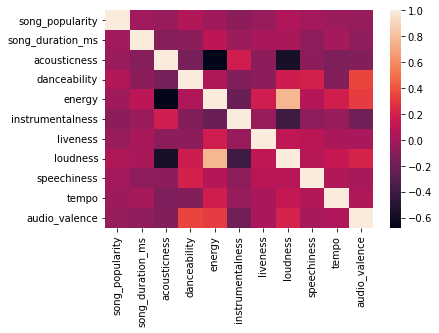

In [22]:
#In the heat map the black dots shows the values that are negatively correlated.
sns.heatmap(df1.corr())